1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# 데이터 확인
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시pred_dt))

In [33]:
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [34]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [35]:
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [36]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
df['buying'] = label_encoder.fit_transform(df['buying'])
df['maint'] = label_encoder.fit_transform(df['maint'])
df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])
df['safety'] = label_encoder.fit_transform(df['safety'])
df['doors'] = label_encoder.fit_transform(df['doors'])
df['persons'] = label_encoder.fit_transform(df['persons'])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,good
1724,1,1,3,2,1,0,vgood
1725,1,1,3,2,0,1,unacc
1726,1,1,3,2,0,2,good


Text(0, 0.5, 'Count')

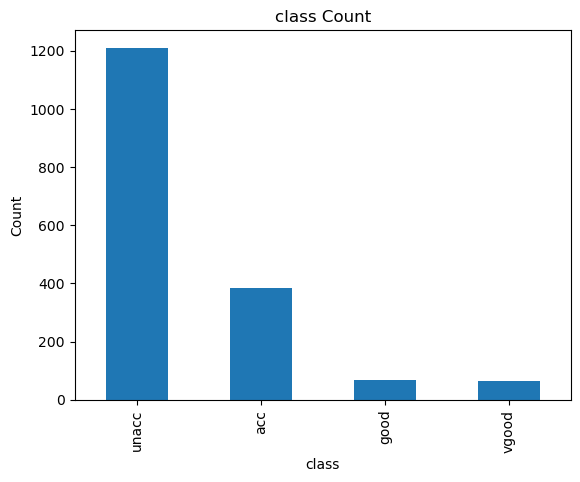

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['class'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('class Count')
plt.xlabel('class')
plt.ylabel('Count')

In [39]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [50]:
y=df['class']
y.value_counts()
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [52]:

Y = pd.get_dummies(y).values

In [53]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296, 4), (432, 4))

In [56]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(6,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\toxh1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 28)                  │             924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │             116 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,320 (9.06 KB)

 Trainable params: 2,320 (9.06 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
import numpy as np

model_history = model.fit(X_train,
                    y_train, 
                    epochs = 10,
                    batch_size = 256, 
                    validation_split = 0.1, 
                    shuffle = True)
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8255 - loss: 0.4465 - val_accuracy: 0.8231 - val_loss: 0.4718
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7996 - loss: 0.4571 - val_accuracy: 0.8231 - val_loss: 0.4569
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8179 - loss: 0.4307 - val_accuracy: 0.8538 - val_loss: 0.4557
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8193 - loss: 0.4642 - val_accuracy: 0.8385 - val_loss: 0.4401
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8148 - loss: 0.4279 - val_accuracy: 0.8308 - val_loss: 0.4288
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8204 - loss: 0.4314 - val_accuracy: 0.8462 - val_loss: 0.4247
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8493 - loss: 0.4115 - val_accuracy: 0.8538 - val_loss: 0.4089
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8394 - loss: 0.3969 - val_accuracy: 0.8538 - val_loss: 0.3993
Epoc

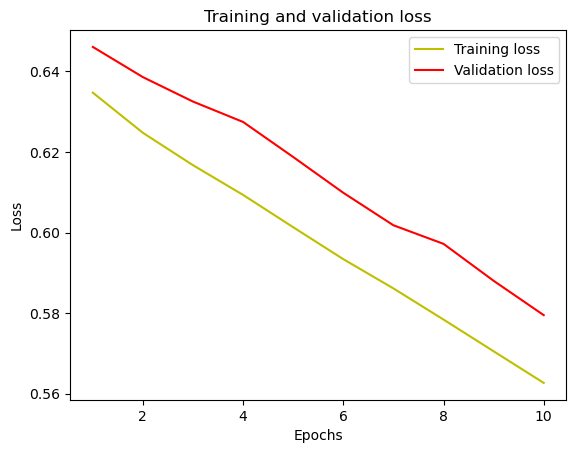

In [65]:

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

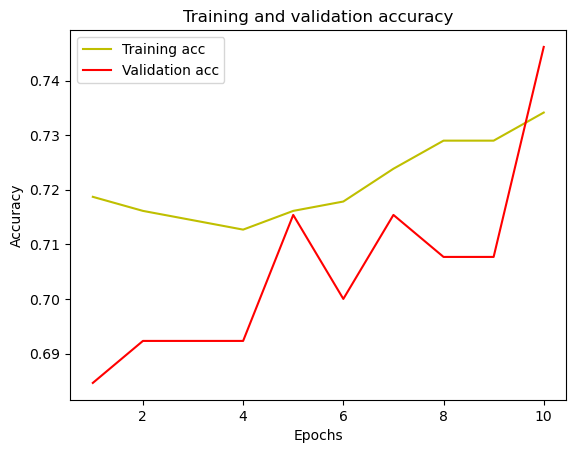

In [66]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       108
           1       0.00      0.00      0.00        17
           2       0.88      0.97      0.92       293
           3       0.64      0.50      0.56        14

    accuracy                           0.83       432
   macro avg       0.55      0.52      0.53       432
weighted avg       0.79      0.83      0.81       432

[[ 67   0  37   4]
 [ 15   0   2   0]
 [  9   0 284   0]
 [  7   0   0   7]]


C:\Users\toxh1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\toxh1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\toxh1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
